# Chicago Food Inspection

In [1]:
import pandas as pd
import numpy as np
import pymysql
import pymysql.cursors
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display
from IPython.display import Image

In [3]:
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='root', db='mysql')

# Drop irrelevant columns

In [5]:
# Import food inspection data from a csv file into a data frame
path = 'Food_Inspections.csv'
insp_data = pd.read_csv(path,sep=',')

# convering contents of these columns to upper case for uniformity
insp_data['DBA Name'] = insp_data['DBA Name'].str.upper()
insp_data['DBA Name'] = insp_data['DBA Name'].str.replace("'","")
insp_data['Facility Type'] = insp_data['Facility Type'].str.upper()
insp_data['Inspection Type'] = insp_data['Inspection Type'].str.upper()
insp_data.index = np.arange(1,len(insp_data)+1)

# Drop irrelevant columns
insp_data = insp_data.drop('Inspection ID',axis=1)
insp_data = insp_data.drop('AKA Name',axis=1)
insp_data = insp_data.drop('City',axis=1)
insp_data = insp_data.drop('State',axis=1)

In [5]:
insp_data

,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,"ANATOLIA KITCHEN & BAKERY, INC.",2564794.0,RESTAURANT,Risk 1 (High),3151 N BROADWAY,60657.0,11/09/2017,LICENSE,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.939194,-87.644224,"(41.93919411054692, -87.64422395471186)"
2,JEWEL FOOD STORE#3632,2037181.0,GROCERY STORE,Risk 1 (High),3630 N SOUTHPORT AVE,60613.0,11/09/2017,SHORT FORM COMPLAINT,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.948005,-87.664186,"(41.948004550829744, -87.66418623070139)"
3,SHINING STAR EARLY LEARNING ACADEMY,2216045.0,DAYCARE ABOVE AND UNDER 2 YEARS,Risk 1 (High),338-348 E 103RD ST,60628.0,11/09/2017,LICENSE RE-INSPECTION,Pass,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.707409,-87.614676,"(41.70740867513449, -87.6146758844207)"
4,SAFARI SOMALI CUISINE,2564379.0,RESTAURANT,Risk 1 (High),6319 N RIDGE AVE,60660.0,11/09/2017,LICENSE RE-INSPECTION,Pass,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.996149,-87.675833,"(41.996149190826735, -87.67583275149421)"
5,FIRST SIP CAFE,2563976.0,RESTAURANT,Risk 2 (Medium),1057 W ARGYLE ST,60640.0,11/09/2017,LICENSE,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.973171,-87.657215,"(41.97317064347998, -87.65721507934661)"
6,BELMONT CAFE,2398190.0,RESTAURANT,Risk 1 (High),928-930 W BELMONT AVE,60657.0,11/09/2017,COMPLAINT RE-INSPECTION,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.940041,-87.652684,"(41.94004143362782, -87.65268367289833)"
7,PROGRESS BAR,2240697.0,LIQUOR,Risk 3 (Low),3359 N HALSTED ST,60657.0,11/09/2017,CANVASS,Out of Business,NaN,41.943573,-87.649227,"(41.94357316110511, -87.64922664095873)"
8,TUTTI FRUITTI COFFEE SHOP,2152594.0,RESTAURANT,Risk 1 (High),5349 W BELMONT AVE,60641.0,11/09/2017,CANVASS,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.938534,-87.761089,"(41.938533531833905, -87.76108915517106)"
9,PROGRESSBAR,2559740.0,LIQUOR,Risk 3 (Low),3359 N HALSTED ST,60657.0,11/09/2017,LICENSE,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.943573,-87.649227,"(41.94357316110511, -87.64922664095873)"
10,"ARCADIAN SUSHI, INC",2108586.0,CATERING,Risk 1 (High),4347 N HARDING AVE,60618.0,11/09/2017,CANVASS,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.960535,-87.726445,"(41.960534729547824, -87.726444749674)"


# Length of deleted data as per Results

In [6]:
# Length of deleted data as per Results (removing No Entry, Not Ready,Out of business and business not located)
no_del_data = len(insp_data[(insp_data.Results == 'No Entry') | (insp_data.Results == 'Not Ready') | 
                   (insp_data.Results == 'Out of Business') | (insp_data.Results == 'Business Not Located')])
no_del_data

19649

In [7]:
insp_data = insp_data[(insp_data.Results != 'Not Ready')]
insp_data = insp_data[(insp_data.Results != 'No Entry')]
insp_data = insp_data[(insp_data.Results != 'Out of Business')]
insp_data = insp_data[(insp_data.Results != 'Business Not Located')]
len(insp_data)

138824

As per Chicago's result structure, an inspection can pass, pass with conditions or fail. So, deleted 19649 data out of 158473  in which results were No Entry, Not Ready,Out of business and business not located

In [8]:
# Replacing strings containing no entry with no entry so that it can be deleted
insp_data['Inspection Type'] = insp_data['Inspection Type'].replace(r'\NO ENTRY','NO ENTRY')
insp_data['Inspection Type'] = insp_data['Inspection Type'].replace(r'''\NO ENTRY-SHORT COMPLAINT)''','NO ENTRY')
insp_data['Inspection Type'] = insp_data['Inspection Type'].replace(r'\OUT OFBUSINESS','OUT OF BUSINESS')

In [9]:
insp_data = insp_data[(insp_data['Inspection Type'] != 'NOT READY')]
insp_data = insp_data[(insp_data['Inspection Type'] != 'NO ENTRY')]
insp_data = insp_data[(insp_data['Inspection Type'] != 'OUT OF BUSINESS')]
insp_data = insp_data[(insp_data['Inspection Type'] != 'BUSINESS NOT LOCATED')]
len(insp_data)

138458

No Entry, Not Ready,Out of business and business not located in Inspection type does not make any sense, so removed

In [10]:
# Sort by DBA Name
insp_data = insp_data.sort_values(by='DBA Name')
insp_data.index = np.arange(1,len(insp_data)+1)
insp_data['Index'] = insp_data.index       # to merge in later steps based on index

In [11]:
#Removing Repetitions and Duplicate Data from Facility Type
insp_data['Facility Type'] = insp_data['Facility Type'].apply(str)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import warnings
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CATER'):
        insp_data['Facility Type'][idx] = 'CATERING SERVICE'

In [15]:
insp_data['Facility Type'] = insp_data['Facility Type'].str.replace("1023","CHILDRENS FACILITY")
insp_data['Facility Type'] = insp_data['Facility Type'].str.replace("CHILDRENS FACILITY-CHILDREN'S SERVICES FACILITY","CHILDRENS FACILITY")

In [16]:
insp_data['Facility Type'] = insp_data['Facility Type'].str.replace("CHILDRENS FACILITY-CHILDREN'S SERVICES FACILITY","CHILDRENS FACILITY")

In [17]:
for idx, value in insp_data['Facility Type'].iteritems():
        if value.startswith('COFFEE'):
            insp_data['Facility Type'][idx] = 'COFFEE SHOP'

In [18]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('1023 CHILD'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [19]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('1023-CHILD'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [20]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('AFTER SCHOOL'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [21]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('ASSIS'):
        insp_data['Facility Type'][idx] = 'ASSISSTED LIVING'

In [22]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('ART'):
        insp_data['Facility Type'][idx] = 'ART GALLERY'

In [23]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('BAKERY'):
        insp_data['Facility Type'][idx] = 'BAKERY/RESTAURANT'

In [24]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('BANQUET'):
        insp_data['Facility Type'][idx] = 'BANQUET FACILITY'

In [25]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CAFE'):
        insp_data['Facility Type'][idx] = 'CAFE'

In [26]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CANDY'):
        insp_data['Facility Type'][idx] = 'CANDY SHOP'

In [27]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CHILD'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [28]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('1005'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [29]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('15 MONTS'):
        insp_data['Facility Type'][idx] = 'CHILDRENS FACILITY'

In [30]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('COMM'):
        insp_data['Facility Type'][idx] = 'COMMISSARY'

In [31]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('CONV'):
        insp_data['Facility Type'][idx] = 'CONVENIENCE STORE'

In [32]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('(CONV'):
        insp_data['Facility Type'][idx] = 'CONVENIENCE STORE'

In [33]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CULINARY'):
        insp_data['Facility Type'][idx] = 'COOKING SCHOOL'

In [34]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CHURCH'):
        insp_data['Facility Type'][idx] = 'CHURCH'

In [35]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('RELIGIOUS'):
        insp_data['Facility Type'][idx] = 'CHURCH'

In [36]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CHARTER'):
        insp_data['Facility Type'][idx] = 'CHARTER CAFE'

In [38]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('CULINARY'):
        insp_data['Facility Type'][idx] = 'COOKING SCHOOL'

In [39]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('DAY'):
        insp_data['Facility Type'][idx] = 'DAY CARE'

In [40]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('DELI'):
        insp_data['Facility Type'][idx] = 'GROCERY STORE'

In [41]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('DAY'):
        insp_data['Facility Type'][idx] = 'DAY CARE'

In [42]:
for idx, value  in insp_data['Facility Type'].iteritems():
    if value.startswith('DINING'):
        insp_data['Facility Type'][idx] = 'BANQUET FACILITY'

In [43]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('DISTRIBUT'):
        insp_data['Facility Type'][idx] = 'DISTRIBUTION CENTER'

In [44]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('DOLLAR'):
        insp_data['Facility Type'][idx] = 'DOLLAR STORE'

In [45]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('DRUG'):
        insp_data['Facility Type'][idx] = 'DRUG STORE'

In [46]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('FOOD '):
        insp_data['Facility Type'][idx] = 'FOOD PANTRY'

In [47]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('DISTRIBUT'):
        insp_data['Facility Type'][idx] = 'DISTRIBUTION CENTER'

In [48]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('FROZEN'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [49]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GAS'):
        insp_data['Facility Type'][idx] = 'GAS STATION/GROCERY'

In [50]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GELATO'):
        insp_data['Facility Type'][idx] = 'CANDY SHOP'

In [51]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GIFT '):
        insp_data['Facility Type'][idx] = 'GIFT SHOP'

In [52]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GIFT'):
        insp_data['Facility Type'][idx] = 'GIFT SHOP'

In [53]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GOLF'):
        insp_data['Facility Type'][idx] = 'GOLF COURSE CONCESSION STAND'

In [54]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('GROCERY'):
        insp_data['Facility Type'][idx] = 'GROCERY/RETAIL STORE'

In [55]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('HEALTH CARE'):
        insp_data['Facility Type'][idx] = 'HEALTH CENTER'

In [56]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('HEALTH CENTER'):
        insp_data['Facility Type'][idx] = 'HEALTH CENTER'

In [57]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('HERBA'):
        insp_data['Facility Type'][idx] = 'HERBAL LIFE SHOP'

In [58]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('HERA'):
        insp_data['Facility Type'][idx] = 'HERBAL LIFE SHOP'

In [59]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('HOOKA'):
        insp_data['Facility Type'][idx] = 'HOOKA BAR'

In [60]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('HOT DOG'):
        insp_data['Facility Type'][idx] = 'HOT DOG STATION'

In [61]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('ICE CREAM'):
        insp_data['Facility Type'][idx] = 'ICE CREAM SHOP'

In [62]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('JUICE'):
        insp_data['Facility Type'][idx] = 'JUICE AND SALAD BAR'

In [63]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('KIDS'):
        insp_data['Facility Type'][idx] = 'KIDS CAFE'

In [64]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('LIQUOR'):
        insp_data['Facility Type'][idx] = 'LIQUOR STORE'

In [65]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('LIVE'):
        insp_data['Facility Type'][idx] = 'LIVE POULTRY'

In [66]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('LONG'):
        insp_data['Facility Type'][idx] = 'LONG TERM CARE FACILITY'

In [67]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('LOUNGE'):
        insp_data['Facility Type'][idx] = 'BANQUET FACILITY'

In [68]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('MFD'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [69]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('MOBILE'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [70]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('MOBIL'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [71]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('MOVIE'):
        insp_data['Facility Type'][idx] = 'MOVIE THEATER'

In [72]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('NON'):
        insp_data['Facility Type'][idx] = 'NOT FOR PROFIT'

In [73]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('NUTRITION'):
        insp_data['Facility Type'][idx] = 'NUTRITION STORE'

In [74]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PACKAGED'):
        insp_data['Facility Type'][idx] = 'PACKAGED FOOD' 

In [75]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PALETERIA/'):
        insp_data['Facility Type'][idx] = 'PALETERIA'

In [76]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PHARMACY/'):
        insp_data['Facility Type'][idx] = 'PHARMACY'

In [77]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('POPCORN'):
        insp_data['Facility Type'][idx] = 'POPCORN SHOP'

In [78]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('POULTRY'):
        insp_data['Facility Type'][idx] = 'LIVE POULTRY'

In [79]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('NUTRITION'):
        insp_data['Facility Type'][idx] = 'NUTRITION STORE'

In [80]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PRE PACKAGED'):
        insp_data['Facility Type'][idx] = 'PACKAGED FOOD'

In [81]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PREPACKAGED'):
        insp_data['Facility Type'][idx] = 'PACKAGED FOOD'

In [82]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PRODUCE'):
        insp_data['Facility Type'][idx] = 'PRODUCE SHOP'  

In [83]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('PUSH'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [84]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('RESTAURANT'):
        insp_data['Facility Type'][idx] = 'RESTAURANT'

In [85]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('REATAURANT'):
        insp_data['Facility Type'][idx] = 'RESTAURANT'

In [86]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('REST'):
        insp_data['Facility Type'][idx] = 'RESTAURANT'

In [87]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('RETAIL'):
        insp_data['Facility Type'][idx] = 'GROCERY/RETAIL STORE'

In [88]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('RIVERWALK'):
        insp_data['Facility Type'][idx] = 'RIVERWALK CAFE'

In [89]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('ROOF'):
        insp_data['Facility Type'][idx] = 'ROOF TOP RESTAURANT'

In [90]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SCHOOL'):
        insp_data['Facility Type'][idx] = 'PRIVATE/PUBLIC SCHOOL'

In [91]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SHARED'):
        insp_data['Facility Type'][idx] = 'SHARED KITCHEN'

In [92]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SLAUGHTER'):
        insp_data['Facility Type'][idx] = 'LIVE POULTRY'

In [93]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SPECIAL EVENT'):
        insp_data['Facility Type'][idx] = 'BANQUET FACILITY'

In [94]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('STORE'):
        insp_data['Facility Type'][idx] = 'GROCERY STORE'

In [95]:
for idx, value in insp_data['Facility Type'].iteritems():
     if value.startswith('SUMMER'):
        insp_data['Facility Type'][idx] = 'SUMMER FEEDING PREP'

In [96]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SUPPORT'):
        insp_data['Facility Type'][idx] = 'SUPPORTIVE LIVING FACILITY'

In [97]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('TAP'):
        insp_data['Facility Type'][idx] = 'TAVERN'

In [98]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('TAVERN'):
        insp_data['Facility Type'][idx] = 'TAVERN'

In [100]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('TEA'):
        insp_data['Facility Type'][idx] = 'TEA STALL'

In [101]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SCHOOL'):
        insp_data['Facility Type'][idx] = 'PRIVATE/PUBLIC SCHOOL'

In [102]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('THEAT'):
        insp_data['Facility Type'][idx] = 'MOVIE THEATER'

In [103]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('TRUCK'):
        insp_data['Facility Type'][idx] = 'MOBILE FOOD TRUCK/DISPENSER'

In [104]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('WHOLESALE'):
        insp_data['Facility Type'][idx] = 'GROCERY/RETAIL STORE'

In [105]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('WRIGLEY'):
        insp_data['Facility Type'][idx] = 'ROOF TOP RESTAURANT'

In [106]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('WINE'):
        insp_data['Facility Type'][idx] = 'WINE STORE'

In [107]:
for idx, value in insp_data['Facility Type'].iteritems():
    if value.startswith('SENIOR'):
        insp_data['Facility Type'][idx] = 'ADULT FAMILY CARE CENTER'

In [14]:
# To check whether there are any dupliactes
d = insp_data.duplicated(subset=['DBA Name','License #','Facility Type','Risk','Address','Zip','Inspection Date','Inspection Type','Results','Violations','Latitude','Longitude','Location'])

In [15]:
num_of_duplicates = 0
duplicates = []
for i in range(1,len(d)):
    if d[i] == True:
        num_of_duplicates = num_of_duplicates + 1
        duplicates.append(i)

# Print the duplicates
print("Total number of duplicates: ",num_of_duplicates)
pd.DataFrame(insp_data.loc[duplicates])

Total number of duplicates:  179


,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Index
178,"1234 BBQ RIBS INC.,",2042583.0,RESTAURANT,Risk 1 (High),1234 N HALSTED ST,60642.0,04/27/2012,CANVASS,Fail,NaN,41.904502,-87.648267,"(41.90450210717989, -87.64826686780404)",178
3701,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,1142007.0,RESTAURANT,Risk 1 (High),836 W WELLINGTON AVE,60657.0,01/10/2013,CANVASS,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.936450,-87.650552,"(41.93645016758182, -87.65055245204128)",3701
5705,AMERICAS DOG,0.0,NAVY PIER KIOSK,Risk 2 (Medium),600 E GRAND AVE,60611.0,06/28/2012,CANVASS,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",5705
5740,AMERICAS DOG,0.0,NAVY PIER KIOSK,Risk 2 (Medium),600 E GRAND AVE,60611.0,06/15/2010,LICENSE,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",5740
5764,AMERICAS DOG,0.0,NAVY PIER KIOSK,Risk 2 (Medium),600 E GRAND AVE,60611.0,06/01/2011,LICENSE,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",5764
8086,ASPIRA HAUGAN,66351.0,SCHOOL,Risk 1 (High),3729 W LELAND AVE,60625.0,01/20/2010,CANVASS,Pass,NaN,41.966378,-87.721826,"(41.96637821294302, -87.72182580739543)",8086
25884,CHURRO FACTORY,0.0,NAVY PIER KIOSK,Risk 2 (Medium),600 E GRAND AVE,60611.0,06/08/2011,LICENSE,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",25884
27793,COMPLETELY NUTS,0.0,NAVY PIER KIOSK,Risk 3 (Low),600 E GRAND AVE,60611.0,06/03/2011,LICENSE,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",27793
27796,COMPLETELY NUTS,0.0,NAVY PIER KIOSK,Risk 3 (Low),600 E GRAND AVE,60611.0,06/14/2012,CANVASS,Pass,NaN,41.892094,-87.611570,"(41.892094136861786, -87.61156988394656)",27796
30793,DE ARCOS PIZZA & RESTAURANT,1577283.0,RESTAURANT,Risk 1 (High),2832 E 87TH ST,60617.0,01/22/2010,TAG REMOVAL,Pass,NaN,41.737447,-87.555039,"(41.737446792721215, -87.55503911795913)",30793


In [16]:
insp_data = insp_data.drop_duplicates(subset=['DBA Name','License #','Facility Type','Risk','Address','Zip','Inspection Date','Inspection Type','Results','Violations','Latitude','Longitude','Location'],keep = 'last')

In [18]:
insp_data

,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Index
1,"#1 CHINA EXPRESS, LTD.",1869616.0,RESTAURANT,Risk 1 (High),4248 S WENTWORTH AVE,60609.0,11/29/2010,CANVASS,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.816834,-87.631346,"(41.816833769262814, -87.6313462733625)",1
2,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,01/22/2013,CANVASS RE-INSPECTION,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",2
3,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,09/19/2016,COMPLAINT,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",3
4,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,11/30/2015,CANVASS RE-INSPECTION,Pass,"43. FOOD (ICE) DISPENSING UTENSILS, WASH CLOTH...",41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",4
5,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,07/01/2010,LICENSE,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",5
6,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,07/06/2010,LICENSE RE-INSPECTION,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",6
7,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,01/26/2016,CANVASS,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",7
8,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,02/24/2015,CANVASS RE-INSPECTION,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",8
9,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,06/17/2014,CANVASS RE-INSPECTION,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",9
10,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,02/17/2015,CANVASS,Fail,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",10


In [17]:
# Get the violation numbers from Violation column
a = insp_data['Violations'].str.extractall('(\d+\.)')
a = a[~a[0].astype(str).str.startswith('0')]
a = a.reset_index(level=1, drop=True)

# replace .
a = a[0]
a = a.str.replace(r'\.','')

In [18]:
# To remove duplicates within the list of violations
def remove_duplicates(values):
    output = []
    seen = set()
    for i in values:
        if i not in seen:
            output.append(i)
            seen.add(i)
    return output

In [19]:
v = []
ind = []
count = []
index = insp_data.index
for i in range(len(index)):
    try:
        # Remove duplicates from this list.
        b = np.array(a[index[i]])
        if len(b) > 1:
            violations = remove_duplicates(b)   
            v.append(violations)
        ind.append(index[i])
        count.append(len(violations))
    except TypeError:
        v.append(a[index[i]])
        ind.append(index[i])
        count.append(1)
        continue
    except:
        v.append(0)
        ind.append(index[i])
        count.append(0)
        continue

In [20]:
vio = pd.DataFrame({'Violations':v})
vio = np.asarray(vio['Violations'])
vio = pd.DataFrame({'Violations':vio})
vio['Index'] = ind
vio['No. of Violations'] = count

In [23]:
vio.head()

,Violations,Index,No. of Violations
0,"[30, 33, 34, 35, 41, 42]",1,6
1,"[18, 33, 43]",2,3
2,"[40, 30, 31, 33, 34, 35, 42, 32]",3,8
3,"[43, 34, 38, 16, 18, 15, 31, 32, 33]",4,9
4,"[2, 57, 3, 54, 56, 31, 35, 38]",5,8


In [21]:
inspection_data = pd.merge(insp_data, vio, on='Index')

In [22]:
inspection_data = inspection_data.drop('Violations_x',axis=1)

In [23]:
inspection_data.index = np.arange(1,len(insp_data)+1)

In [120]:
inspection_data

,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude,Location,Index,Violations_y,No. of Violations
1,"#1 CHINA EXPRESS, LTD.",1869616.0,RESTAURANT,Risk 1 (High),4248 S WENTWORTH AVE,60609.0,11/29/2010,CANVASS,Pass,41.816834,-87.631346,"(41.816833769262814, -87.6313462733625)",1,"[30, 33, 34, 35, 41, 42]",6
2,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,01/22/2013,CANVASS RE-INSPECTION,Pass,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",2,"[18, 33, 43]",3
3,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,09/19/2016,COMPLAINT,Pass,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",3,"[40, 30, 31, 33, 34, 35, 42, 32]",8
4,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,11/30/2015,CANVASS RE-INSPECTION,Pass,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",4,"[43, 34, 38, 16, 18, 15, 31, 32, 33]",9
5,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,07/01/2010,LICENSE,Fail,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",5,"[2, 57, 3, 54, 56, 31, 35, 38]",8
6,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,07/06/2010,LICENSE RE-INSPECTION,Fail,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",6,"[2, 3, 31, 38, 35]",5
7,#1 CHOP SUEY,2042372.0,RESTAURANT,Risk 1 (High),1907 W 87TH ST,60620.0,01/26/2016,CANVASS,Pass,41.735578,-87.670781,"(41.735578274725285, -87.67078075079954)",7,"[34, 38, 33]",3
8,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,02/24/2015,CANVASS RE-INSPECTION,Pass,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",8,"[33, 35, 45, 34, 29, 32]",6
9,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,06/17/2014,CANVASS RE-INSPECTION,Pass,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",9,"[18, 33, 34, 35, 38, 32]",6
10,#1 CHOP SUEY,1970042.0,RESTAURANT,Risk 1 (High),4307 W IRVING PARK RD,60641.0,02/17/2015,CANVASS,Fail,41.953443,-87.735763,"(41.953443449987795, -87.73576333403281)",10,"[29, 32, 34, 33, 35, 45]",6


In [24]:
# For SQL upload
x = inspection_data
x = x.drop('Location',axis=1)
x = x.drop('Violations_y',axis=1)
# Rearranging the columns
x = x[['Index','DBA Name','License #','Facility Type','Risk','Address','Zip','Inspection Date','Inspection Type','Results','Latitude','Longitude','No. of Violations']]

In [120]:
# Download it to local
x.to_csv('inspection_data.csv')

In [25]:
#Converting Categorical variable to Numeric For Results
df = insp_data
df['Results'] = df['Results'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
cat_columns

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Histogram Plot depicting Results

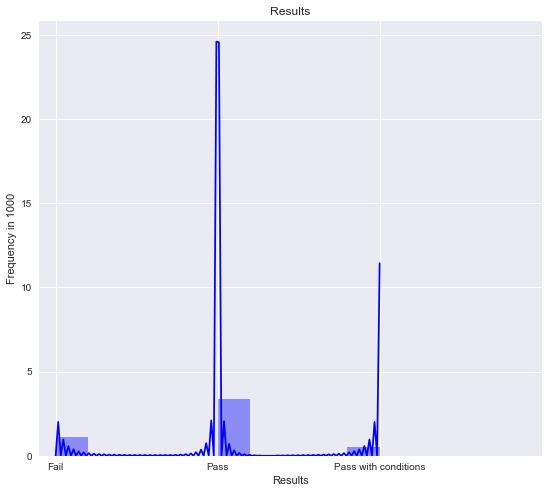

In [26]:
############Plotting Results in Histogram#############
import matplotlib.patches as mpatches
plt.figure(figsize=(9, 8))
sns.distplot(df['Results'], color='b', bins=10,hist_kws={'alpha': 0.4});  
my_xticks = ['Fail','Pass','Pass with conditions']
x = np.array([0,1,2,3])
plt.xticks(x, my_xticks)
plt.title('Results')
plt.ylabel('Frequency in 1000')
plt.show()

In [27]:
# PLOTTING INSPECTION TYPE TO DATE

##Converting Categorical variable in Inspection Type to Numerical value

import warnings
warnings.filterwarnings('ignore')

insp_data['Inspection Type'] = insp_data['Inspection Type'].astype('category')
cat_Ins_type = insp_data.select_dtypes(['category']).columns
cat_Ins_type

insp_data[cat_Ins_type] = insp_data[cat_Ins_type].apply(lambda x: x.cat.codes)

In [28]:
insp_data['Inspection Date'] = pd.to_datetime(insp_data['Inspection Date'],format = '%m/%d/%Y')
insp_data['Inspection Date'] = insp_data['Inspection Date'].dt.strftime('%Y/%m')

# Plot depicting Inspection Type with the date for each facility type

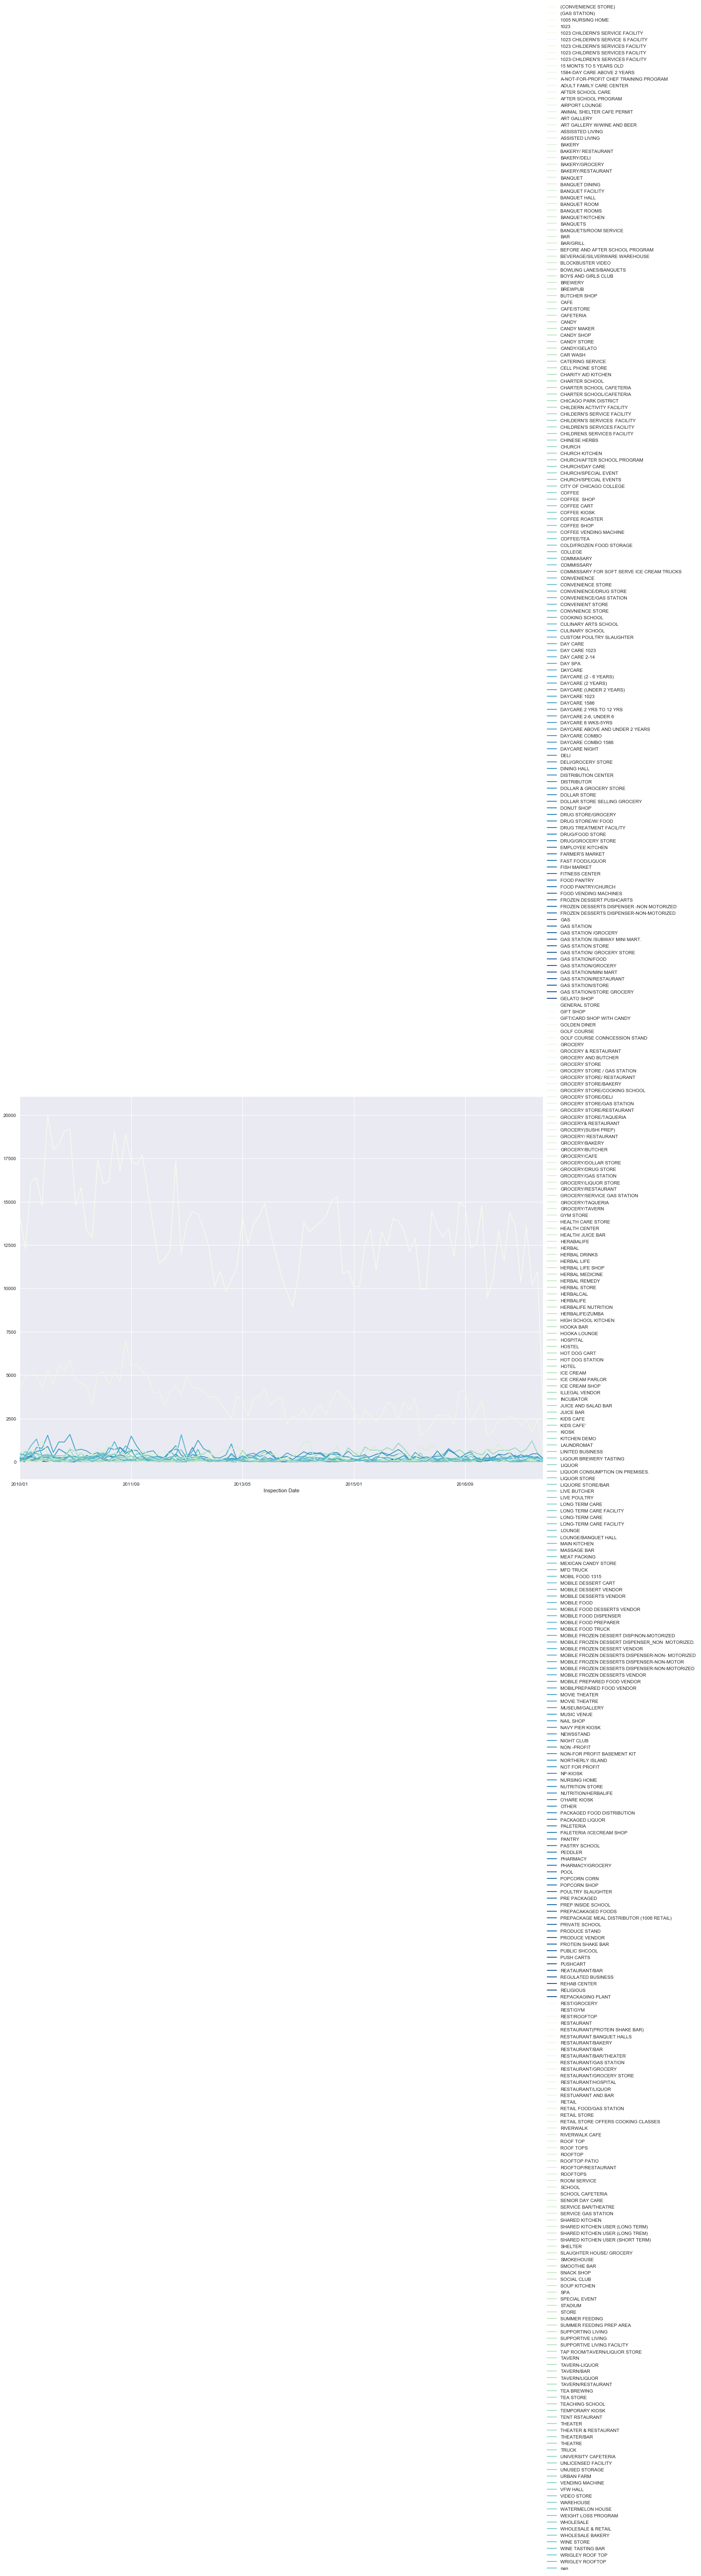

In [29]:
count_by_date = insp_data.pivot_table('Inspection Type',columns = 'Facility Type', index ='Inspection Date',aggfunc=np.sum)
count_by_date
colors = plt.cm.GnBu(np.linspace(0, 1, 152))
fig, ax = plt.subplots(figsize=(20, 15))
count_by_date.plot(ax=ax,color = colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


# Plot depicting Facility Type and No.of Inspections

In [30]:
df9 = pd.read_sql('''select facility_type, x.no_of_inspections from (select Facility_Type, count(Facility_Type) as no_of_inspections
from inspection_data.inspection_report 
group by Facility_Type ) as x
where x.no_of_inspections > 500''', con = conn)

In [131]:
df9

,facility_type,no_of_inspections
0,BAKERY/RESTAURANT,2087
1,CATERING SERVICE,787
2,CHILDRENS FACILITY,1876
3,DAY CARE,4818
4,GROCERY/RETAIL STORE,19474
5,LIQUOR STORE,683
6,LONG TERM CARE FACILITY,915
7,MOBILE FOOD TRUCK/DISPENSER,1254
8,PRIVATE/PUBLIC SCHOOL,9431
9,RESTAURANT,92946


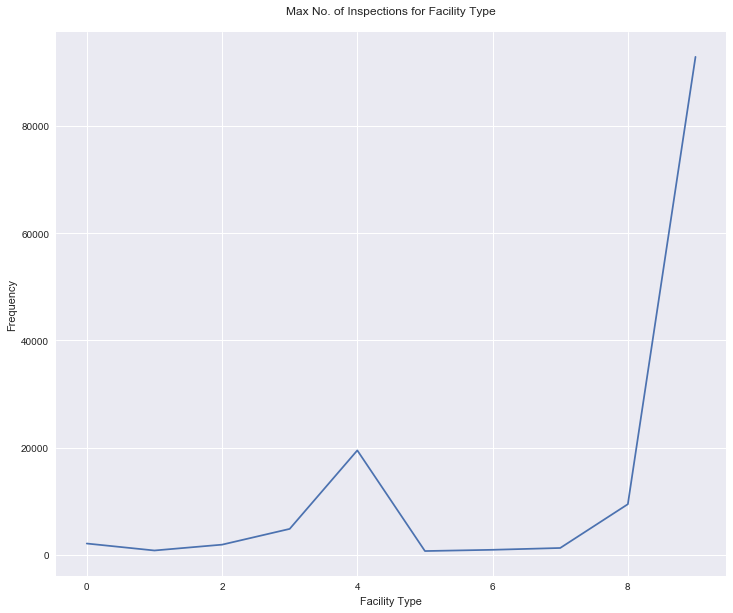

In [35]:
fig = plt.figure(figsize=[12,10])
ax = plt.plot(df9.index,df9.no_of_inspections)
plt.title('Max No. of Inspections for Facility Type\n')
plt.xlabel('Facility Type')
plt.ylabel('Frequency')

# Base Map that shows the areas for which the Results are plotted according to the number of violations 

In [36]:
# get latitude and longitude for violations > 10 with result pass, fail and pass with conditions
df1 = pd.read_sql('''select Latitude, Longitude from inspection_data.inspection_report 
                     where Results = 1 and No_of_Violations > 10''', con = conn)
df2 = pd.read_sql('''select Latitude, Longitude from inspection_data.inspection_report 
                     where Results = 0 and No_of_Violations > 10''', con = conn)
df3 = pd.read_sql('''select Latitude, Longitude from inspection_data.inspection_report 
                     where Results = 2 and No_of_Violations > 10''', con = conn)

In [37]:
# Collect Longitude & Latitude Information
lat1=pd.DataFrame(df1['Latitude'])
lat1=lat1.set_index("Latitude")
lat1=list(lat1.index)
lon1=pd.DataFrame(df1['Longitude'])
lon1=lon1.set_index("Longitude")
lon1=list(lon1.index)

lat2=pd.DataFrame(df2['Latitude'])
lat2=lat2.set_index("Latitude")
lat2=list(lat2.index)
lon2=pd.DataFrame(df2['Longitude'])
lon2=lon2.set_index("Longitude")
lon2=list(lon2.index)

lat3=pd.DataFrame(df3['Latitude'])
lat3=lat3.set_index("Latitude")
lat3=list(lat3.index)
lon3=pd.DataFrame(df3['Longitude'])
lon3=lon3.set_index("Longitude")
lon3=list(lon3.index)

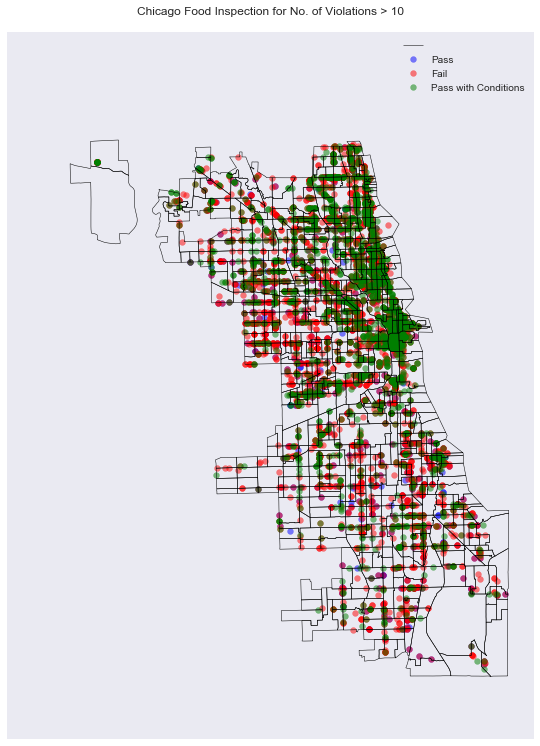

In [42]:
fig = plt.figure(figsize=[14,13])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons1 = lon1
lats1 = lat1
lons2 = lon2
lats2 = lat2
lons3 = lon3
lats3 = lat3
x1,y1 = m(lons1,lats1)
x2,y2 = m(lons2,lats2)
x3,y3 = m(lons3,lats3)
#colors = ["blue","red","green"]
#for i in range(1,3):
#    plt.scatter(x[i],y[i],alpha=0.5,s=35,color = colors[i])
plt.scatter(x1,y1,alpha=0.5,s=35,color = 'b')
plt.scatter(x2,y2,alpha=0.5,s=35,color = 'r')
plt.scatter(x3,y3,alpha=0.5,s=35,color = 'g')
#text = iter(["Pass","Fail","Pass with Conditions"])
plt.legend(["","Pass","Fail","Pass with Conditions"])
plt.title("Chicago Food Inspection for No. of Violations > 10\n")
plt.show()

# Table showing the Inspection Type and the number/count of the corresponding type

In [43]:
df4 = pd.read_sql('''select Inspection_Type, x.no_of_inspections from (select Inspection_type, count(inspection_type) as no_of_inspections
from inspection_data.inspection_report 
group by Inspection_type) as x
where x.no_of_inspections > 100''', con = conn)

In [137]:
df4

,Inspection_Type,no_of_inspections
0,CANVASS,66712
1,CANVASS RE-INSPECTION,15949
2,COMPLAINT,13790
3,COMPLAINT RE-INSPECTION,5778
4,COMPLAINT-FIRE,154
5,CONSULTATION,650
6,LICENSE,19171
7,LICENSE RE-INSPECTION,7379
8,LICENSE-TASK FORCE,603
9,RECENT INSPECTION,207


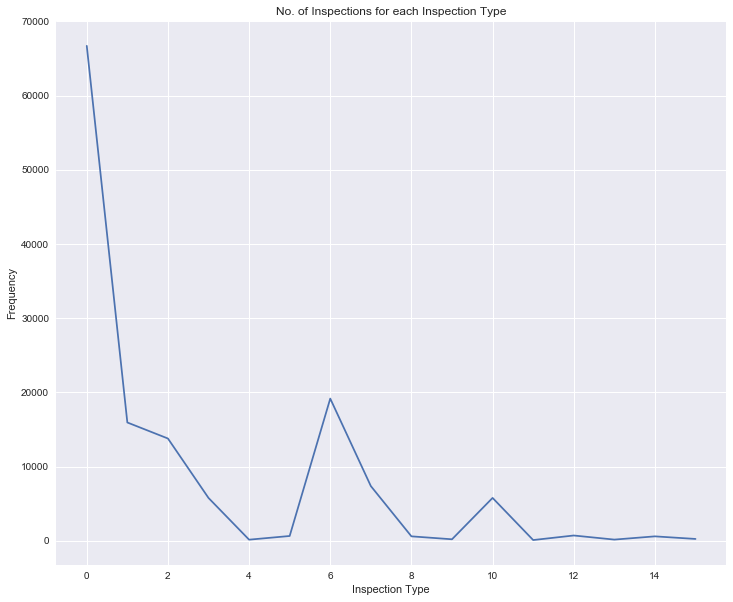

In [45]:
fig = plt.figure(figsize=[12,10])
ax = plt.plot(df4.index,df4.no_of_inspections)
plt.title('No. of Inspections for each Inspection Type')
plt.xlabel('Inspection Type')
plt.ylabel('Frequency')

# Base map that depicts the areas according to the Risk Types 

In [46]:
df5 = pd.read_sql('''select zip, risk, Latitude, Longitude from inspection_data.inspection_report where Risk = 'All'group by risk,zip''', con = conn)
df6 = pd.read_sql('''select zip, risk, Latitude, Longitude from inspection_data.inspection_report where Risk = 'Risk 1 (High)'group by risk,zip''',con = conn)
df7 = pd.read_sql('''select zip, risk, Latitude, Longitude from inspection_data.inspection_report where Risk = 'Risk 2 (Medium)'group by risk,zip''',con = conn)
df8 = pd.read_sql('''select zip, risk, Latitude, Longitude from inspection_data.inspection_report where Risk = 'Risk 3 (Low)'group by risk,zip''',con = conn)

In [47]:
# Collect Longitude & Latitude Information
lat1=pd.DataFrame(df5['Latitude'])
lat1=lat1.set_index("Latitude")
lat1=list(lat1.index)
lon1=pd.DataFrame(df5['Longitude'])
lon1=lon1.set_index("Longitude")
lon1=list(lon1.index)

lat2=pd.DataFrame(df6['Latitude'])
lat2=lat2.set_index("Latitude")
lat2=list(lat2.index)
lon2=pd.DataFrame(df6['Longitude'])
lon2=lon2.set_index("Longitude")
lon2=list(lon2.index)

lat3=pd.DataFrame(df7['Latitude'])
lat3=lat3.set_index("Latitude")
lat3=list(lat3.index)
lon3=pd.DataFrame(df7['Longitude'])
lon3=lon3.set_index("Longitude")
lon3=list(lon3.index)

lat4=pd.DataFrame(df8['Latitude'])
lat4=lat4.set_index("Latitude")
lat4=list(lat4.index)
lon4=pd.DataFrame(df8['Longitude'])
lon4=lon4.set_index("Longitude")
lon4=list(lon4.index)

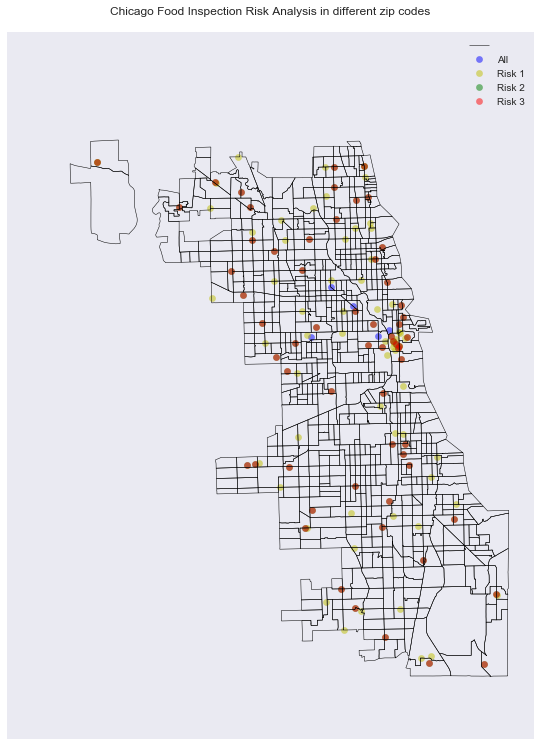

In [50]:
fig = plt.figure(figsize=[14,13])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons1 = lon1
lats1 = lat1
lons2 = lon2
lats2 = lat2
lons3 = lon3
lats3 = lat3
lons4 = lon4
lats4 = lat4
x1,y1 = m(lons1,lats1)
x2,y2 = m(lons2,lats2)
x3,y3 = m(lons3,lats3)
x4,y4 = m(lons4,lats4)
plt.scatter(x1,y1,alpha=0.5,s=40,color = 'b')
plt.scatter(x2,y2,alpha=0.5,s=40,color = 'y')
plt.scatter(x3,y3,alpha=0.5,s=40,color = 'g')
plt.scatter(x3,y3,alpha=0.5,s=40,color = 'r')
plt.legend(["","All","Risk 1","Risk 2","Risk 3"])
plt.title("Chicago Food Inspection Risk Analysis in different zip codes\n")
plt.show()

# Base Map that shows the Business unit branches that have the maximum number of inspections

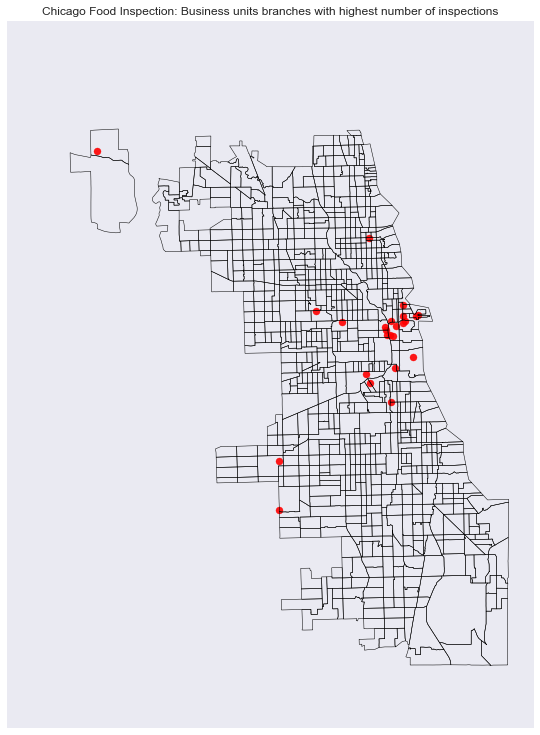

In [51]:
df = pd.read_sql("select count(Inspection_Type) as count, DBA_Name, Latitude, Longitude from inspection_data.inspection_report group by Longitude, Latitude order by count desc limit 25",con=conn)
df = pd.DataFrame(df, columns=['count', 'DBA Name', 'Latitude', 'Longitude'])

lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

fig = plt.figure(figsize=[14,13])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.9,s=50, color ='r')
plt.title("Chicago Food Inspection: Business units branches with highest number of inspections")
# the business unit branches with their respectice number of inspections
plt.show()

# Table showing the No_of_Inspections for each Business Chain in Chicago

In [143]:
#DBA's with highest number of inspections(100)
cursor = pd.read_sql("select count(Inspection_Type) as No_of_Inspections,DBA_Name from inspection_data.inspection_report group by DBA_Name order by No_of_Inspections desc limit 29",con = conn)
df = pd.DataFrame(cursor)  
                  #columns=['No_of_Inspections', 'DBA_Name'])
df  

,No_of_Inspections,DBA_Name
0,2177,SUBWAY
1,1135,DUNKIN DONUTS
2,586,MCDONALD'S
3,378,7-ELEVEN
4,349,MCDONALDS
5,343,CHIPOTLE MEXICAN GRILL
6,222,POTBELLY SANDWICH WORKS LLC
7,200,POTBELLY SANDWICH WORKS
8,197,AU BON PAIN
9,196,CORNER BAKERY CAFE


# What Types of Ratings do Facilities get ?

In [145]:
cursor = pd.read_sql("select inspection_report.Facility_Type, inspection_report.Risk from inspection_data.inspection_report group by Facility_Type order by Facility_Type",con = conn)
Rating = pd.DataFrame(cursor, columns = ['Facility_Type','Risk'])
Rating.head(20)


,Facility_Type,Risk
0,(GAS STATION),Risk 3 (Low)
1,1584-DAY CARE ABOVE 2 YEARS,Risk 1 (High)
2,A-NOT-FOR-PROFIT CHEF TRAINING PROGRAM,Risk 1 (High)
3,ADULT FAMILY CARE CENTER,Risk 1 (High)
4,AIRPORT LOUNGE,Risk 3 (Low)
5,ANIMAL SHELTER CAFE PERMIT,Risk 3 (Low)
6,ART GALLERY,Risk 3 (Low)
7,ASSISSTED LIVING,Risk 1 (High)
8,BAKERY/RESTAURANT,Risk 2 (Medium)
9,BANQUET FACILITY,Risk 1 (High)


# Which Restaurant chains fail inspections most ?

In [146]:
cursor = pd.read_sql('''select distinct(DBA_Name),count(DBA_Name) as Count_of_Fail_as_Result from inspection_data.inspection_report where Facility_Type = "RESTAURANT" AND Results = 0 group by DBA_Name order by Count_of_Fail_as_Result DESC limit 3''', con = conn)
Fail = pd.DataFrame(cursor, columns = ['DBA_Name','Count_of_Fail_as_Result'])
Fail

,DBA_Name,Count_of_Fail_as_Result
0,SUBWAY,289
1,DUNKIN DONUTS,183
2,MCDONALD'S,127


# Where are failures most common ?

In [19]:
cursor = pd.read_sql('''select distinct(Facility_Type),count(Facility_Type) as Count_of_Fail_as_Result from inspection_data.inspection_report
where Results = 0 group by Facility_Type order by Count_of_Fail_as_Result DESC limit 10''', con = conn)
Failures = pd.DataFrame(cursor, columns = ['Facility_Type','Count_of_Fail_as_Result'])
Failures

,Facility_Type,Count_of_Fail_as_Result
0,RESTAURANT,19513
1,GROCERY/RETAIL STORE,5261
2,PRIVATE/PUBLIC SCHOOL,1814
3,DAY CARE,1025
4,BAKERY/RESTAURANT,493
5,MOBILE FOOD TRUCK/DISPENSER,397
6,CHILDRENS FACILITY,353
7,nan,286
8,LIQUOR STORE,275
9,LONG TERM CARE FACILITY,185


# Probability Project :

In [31]:
c = pd.read_sql('''select Risk from inspection_data.inspection_report where Facility_Type = 'RESTAURANT' and Risk != 'All' and Risk != ' ' ''', con = conn)
risk_res = pd.DataFrame(c, columns = ['Risk'])

In [32]:
#Converting Categorical variable to Numeric For Results
df = insp_data
risk_res['Risk'] = risk_res['Risk'].astype('category')
cat_columns_risk = risk_res.select_dtypes(['category']).columns
cat_columns_risk

risk_res[cat_columns_risk] = risk_res[cat_columns_risk].apply(lambda x: x.cat.codes)

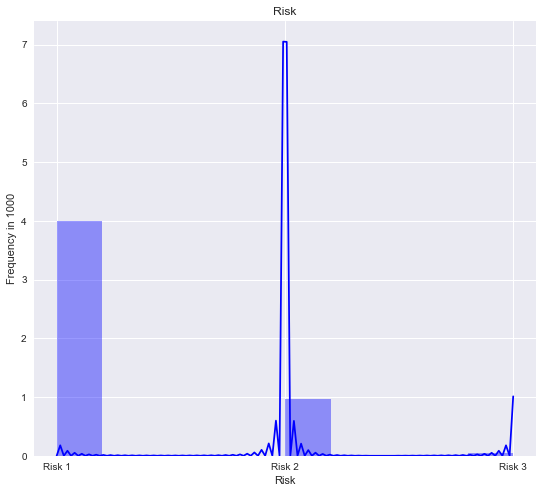

In [68]:
############Plotting Results in Histogram#############
import matplotlib.patches as mpatches
plt.figure(figsize=(9, 8))
sns.distplot(risk_res['Risk'], color='b', bins=10,hist_kws={'alpha': 0.4});  
my_xticks = ['Risk 1','Risk 2','Risk 3']
x = np.array([0,1,2])
plt.xticks(x, my_xticks)
plt.title('Risk')
plt.ylabel('Frequency in 1000')
plt.show()
# We can see that for Restaurant , risk 1 has highest count

In [66]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import numpy
import math

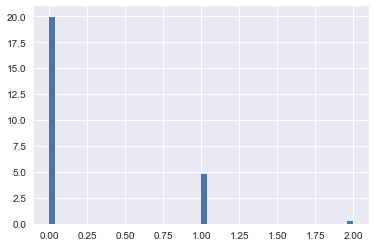

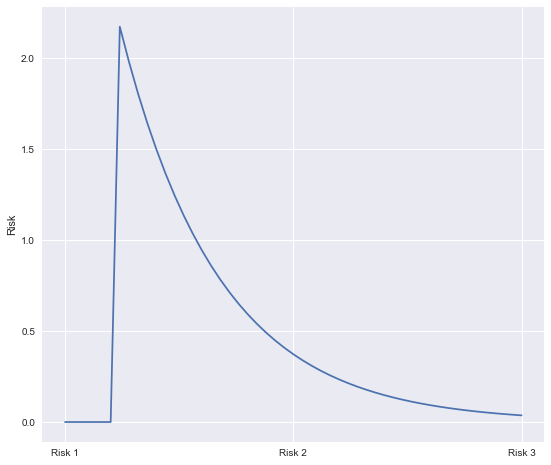

In [67]:
n, bins, patches = plt.hist(risk_res['Risk'], 50, normed=1)
mu = np.mean(risk_res['Risk'])
sigma = np.std(risk_res['Risk'])
plt.figure(figsize=(9, 8))
x = np.array([0,1,2])
my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)
plt.plot(bins, stats.expon.pdf(bins, mu, sigma))
plt.ylabel("Risk")
plt.show()
# on fitting an exponential model from the histogram plot

# Facility as Grocery Store with Risk

In [43]:
c = pd.read_sql('''select Risk from inspection_data.inspection_report where Facility_Type = 'GROCERY/RETAIL STORE' and Risk != 'All' and Risk != ' ' ''', con = conn)
risk_gro = pd.DataFrame(c, columns = ['Risk'])



In [44]:
#Converting Categorical variable to Numeric For Results
df = insp_data
risk_gro['Risk'] = risk_gro['Risk'].astype('category')
cat_columns_risk = risk_gro.select_dtypes(['category']).columns
cat_columns_risk

risk_gro[cat_columns_risk] = risk_gro[cat_columns_risk].apply(lambda x: x.cat.codes)

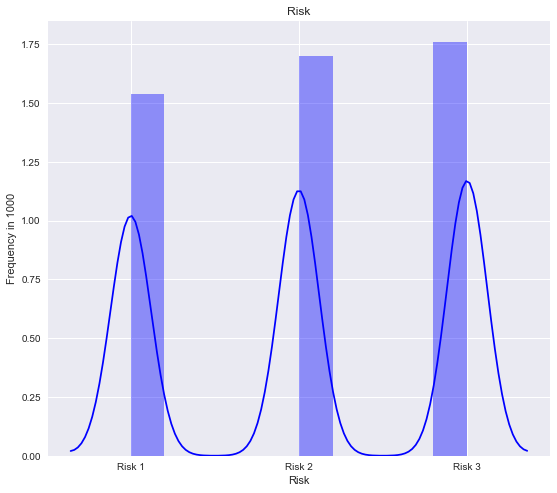

In [54]:
############Plotting Results in Histogram#############
import matplotlib.patches as mpatches
plt.figure(figsize=(9, 8))
sns.distplot(risk_gro['Risk'], color='b', bins=10,hist_kws={'alpha': 0.4});  
#my_xticks = ['Fail','Pass','Pass with conditions']
x = np.array([0,1,2])
#plt.xticks(x, my_xticks)
x = np.array([0,1,2])

my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)
plt.title('Risk')
plt.ylabel('Frequency in 1000')
plt.show()

([<matplotlib.axis.XTick at 0x1c39d61b048>,
 <a list of 3 Text xticklabel objects>)

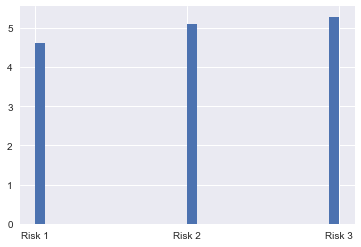

In [55]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(risk_gro['Risk'], 30, normed=True)
x = np.array([0,1,2])

my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)



([<matplotlib.axis.XTick at 0x1c39ce6f390>,
 <a list of 3 Text xticklabel objects>)

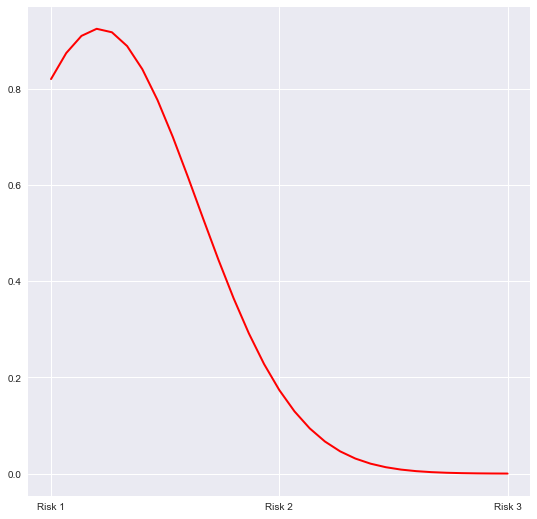

In [53]:
plt.figure(figsize=(9, 9))
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
x = np.array([0,1,2])
my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)

# Facility Type as School with Risk

In [69]:
c = pd.read_sql('''select Risk from inspection_data.inspection_report where Facility_Type = 'PRIVATE/PUBLIC SCHOOL' and Risk != 'All' and Risk != ' ' ''', con = conn)
risk_sch = pd.DataFrame(c, columns = ['Risk'])


In [70]:
#Converting Categorical variable to Numeric For Results
df = insp_data
risk_sch['Risk'] = risk_sch['Risk'].astype('category')
cat_columns_risk = risk_sch.select_dtypes(['category']).columns
cat_columns_risk

risk_sch[cat_columns_risk] = risk_sch[cat_columns_risk].apply(lambda x: x.cat.codes)

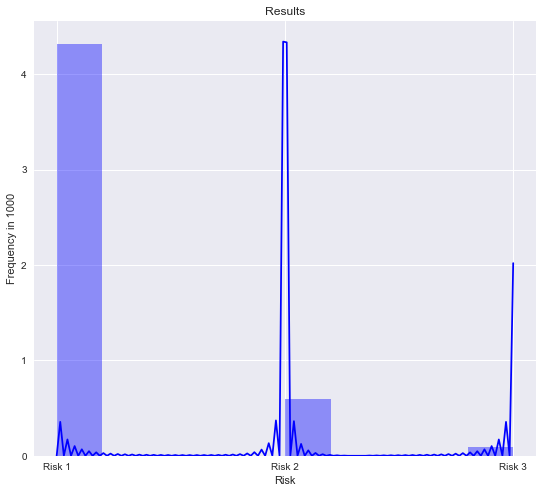

In [71]:
############Plotting Results in Histogram#############
import matplotlib.patches as mpatches
plt.figure(figsize=(9, 8))
sns.distplot(risk_sch['Risk'], color='b', bins=10,hist_kws={'alpha': 0.4});  
#my_xticks = ['Fail','Pass','Pass with conditions']
x = np.array([0,1,2])
x = np.array([0,1,2])

my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)
plt.title('Results')
plt.ylabel('Frequency in 1000')
plt.show()

([<matplotlib.axis.XTick at 0x1c39cf38208>,
 <a list of 3 Text xticklabel objects>)

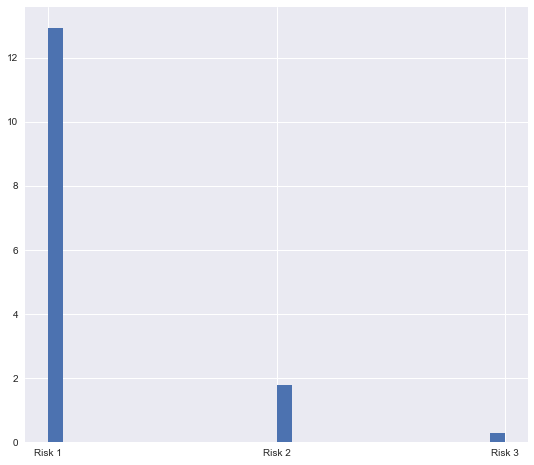

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
count, bins, ignored = plt.hist(risk_sch['Risk'], 30, normed=True)

x = np.array([0,1,2])
my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)

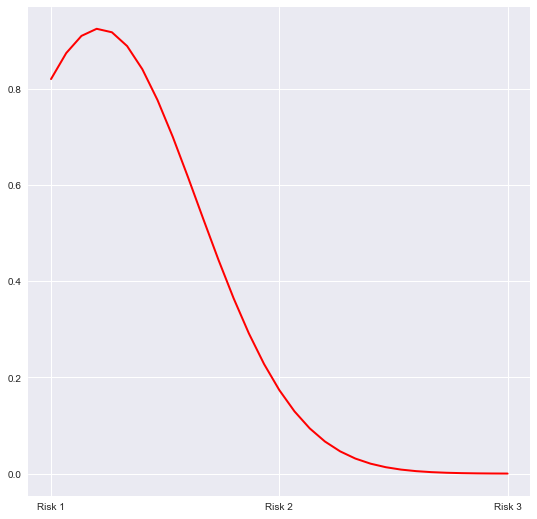

In [73]:
plt.figure(figsize=(9, 9))
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
x = np.array([0,1,2])
my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)
plt.show()

In [63]:
cursor = pd.read_sql('''select X.Facility_Type,X.Risk , count(X.Risk) as count
from (select Facility_Type,Risk from inspection_data.inspection_report where Facility_Type = 'GROCERY/RETAIL STORE' 
) as X where Risk != 'All' and Risk != ' '
group by X.Risk''', con = conn)
Risk_Grocery = pd.DataFrame(cursor, columns = ['Facility_Type','Risk','count'])
Risk_Grocery

,Facility_Type,Risk,count
0,GROCERY/RETAIL STORE,Risk 1 (High),5988
1,GROCERY/RETAIL STORE,Risk 2 (Medium),6626
2,GROCERY/RETAIL STORE,Risk 3 (Low),6858


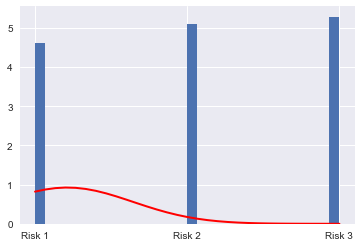

In [64]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(risk_sch['Risk'], 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',)
x = np.array([0,1,2])
my_xticks = ['Risk 1','Risk 2','Risk 3']
plt.xticks(x, my_xticks)
plt.show()

# Splitting the data into test and train set 

In [172]:
msk = np.random.rand(len(inspection_data)) < 0.9
train = inspection_data[msk]
A =train[[x.startswith('RESTAURANT') for x in train['Facility Type']]]
print("Train record")
x = print(len(A))
B1 = A[(A['Risk']=='Risk 1 (High)')]
count_1 = len(B1.index)
B2 = A[(A['Risk']=='Risk 2 (Medium)')]
count_2 = len(B2.index)
B3 = A[(A['Risk']=='Risk 3 (Low)')]
count_3 = len(B3.index)
print(count_1)
print(count_2)
print(count_3)
print("Ratio - Risk1: Risk2: Risk3 = ", count_1,":",count_2,":",count_3)

Train record
83662
66761
16084
813
Ratio - Risk1: Risk2: Risk3 =  66761 : 16084 : 813


In [173]:
test = inspection_data[~msk]
A =test[[x.startswith('RESTAURANT') for x in test['Facility Type']]]
print("Test record")
x = print(len(A))
B1 = A[(A['Risk']=='Risk 1 (High)')]
count_1 = len(B1.index)
B2 = A[(A['Risk']=='Risk 2 (Medium)')]
count_2 = len(B2.index)
B3 = A[(A['Risk']=='Risk 3 (Low)')]
count_3 = len(B3.index)
print(count_1)
print(count_2)
print(count_3)
print("Ratio - Risk1: Risk2: Risk3 = ", count_1,":",count_2,":",count_3)

Test record
9387
7496
1811
80
Ratio - Risk1: Risk2: Risk3 =  7496 : 1811 : 80


## The ratio of train:test is almost the same. 

# Part c

In [174]:
cursor = pd.read_sql('''select X.Facility_Type,X.Risk , count(X.Risk) as count
from (select Facility_Type,Risk from inspection_data.inspection_report where Facility_Type = 'RESTAURANT' 
) as X where Risk != 'All' and Risk != ' '
group by X.Risk''', con = conn)
Risk_Restaurant = pd.DataFrame(cursor, columns = ['Facility_Type','Risk','count'])
Risk_Restaurant

,Facility_Type,Risk,count
0,RESTAURANT,Risk 1 (High),74176
1,RESTAURANT,Risk 2 (Medium),17877
2,RESTAURANT,Risk 3 (Low),889


In [175]:
cursor = pd.read_sql('''select X.Facility_Type,X.Risk , count(X.Risk) as count
from (select Facility_Type,Risk from inspection_data.inspection_report where Facility_Type LIKE 'PRIVATE/PUBLIC SCHOOL' 
) as X where Risk != 'All' and Risk != ' '
group by X.Risk''', con = conn)
Risk_School = pd.DataFrame(cursor, columns = ['Facility_Type','Risk','count'])
Risk_School

,Facility_Type,Risk,count
0,PRIVATE/PUBLIC SCHOOL,Risk 1 (High),8135
1,PRIVATE/PUBLIC SCHOOL,Risk 2 (Medium),1116
2,PRIVATE/PUBLIC SCHOOL,Risk 3 (Low),180


In [176]:
cursor = pd.read_sql('''select Risk,Facility_Type,count(Risk) as count from inspection_data.inspection_report where Risk != ' ' and Risk != 'All' and
 Facility_Type = 'RESTAURANT' OR Facility_Type = 'GROCERY/RETAIL STORE' 
OR Facility_Type = 'PRIVATE/PUBLIC SCHOOL' 
 group by Risk,Facility_Type  order by Risk desc''', con = conn)
Risk_plot = pd.DataFrame(cursor, columns = ['Risk','Facility_Type','count'])
Risk_plot

,Risk,Facility_Type,count
0,Risk 3 (Low),GROCERY/RETAIL STORE,6858
1,Risk 3 (Low),PRIVATE/PUBLIC SCHOOL,180
2,Risk 3 (Low),RESTAURANT,889
3,Risk 2 (Medium),GROCERY/RETAIL STORE,6626
4,Risk 2 (Medium),PRIVATE/PUBLIC SCHOOL,1116
5,Risk 2 (Medium),RESTAURANT,17877
6,Risk 1 (High),GROCERY/RETAIL STORE,5988
7,Risk 1 (High),PRIVATE/PUBLIC SCHOOL,8135
8,Risk 1 (High),RESTAURANT,74176
9,,GROCERY/RETAIL STORE,2


# Plotting the Risk according to the top 3 Facility Types

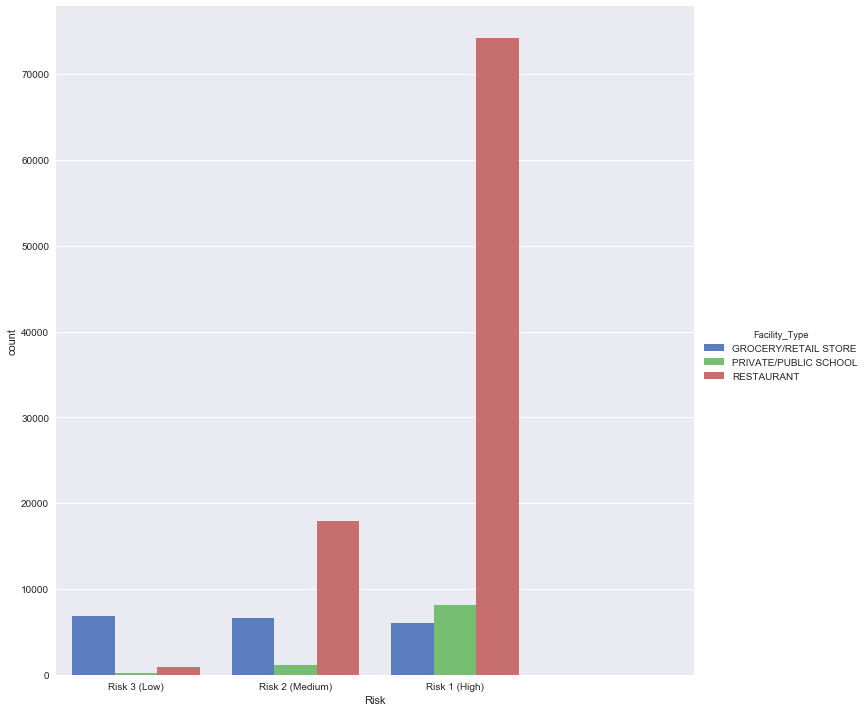

In [177]:
import seaborn as sns
g = sns.factorplot(x="Risk", y="count", hue="Facility_Type", data=Risk_plot,
                   size=10, kind="bar", palette="muted")
# Restaurant highly prone